In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import json
import matplotlib.patches as patcher
import math
import cv2

In [2]:
! pwd

/gscratch/stf/dcashon/ee596/spr2019_ee596_project


In [3]:
train_labels = Path('./data/bdd100k/labels/bdd100k_labels_images_train.json')
train_img_full = Path('./data/bdd100k/images/100k/train')
img_locs = [train_img_full / x for x in os.listdir(train_img_full)]

In [4]:
labels = json.load(open(train_labels, 'rb'))

In [5]:
labels[0]

{'name': '0000f77c-6257be58.jpg',
 'attributes': {'weather': 'clear',
  'scene': 'city street',
  'timeofday': 'daytime'},
 'timestamp': 10000,
 'labels': [{'category': 'traffic light',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'green'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1125.902264,
    'y1': 133.184488,
    'x2': 1156.978645,
    'y2': 210.875445},
   'id': 0},
  {'category': 'traffic light',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'green'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1156.978645,
    'y1': 136.637417,
    'x2': 1191.50796,
    'y2': 210.875443},
   'id': 1},
  {'category': 'traffic sign',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1101.731743,
    'y1': 211.122087,
    'x2': 1170.79037,
    

(720, 1280, 3)


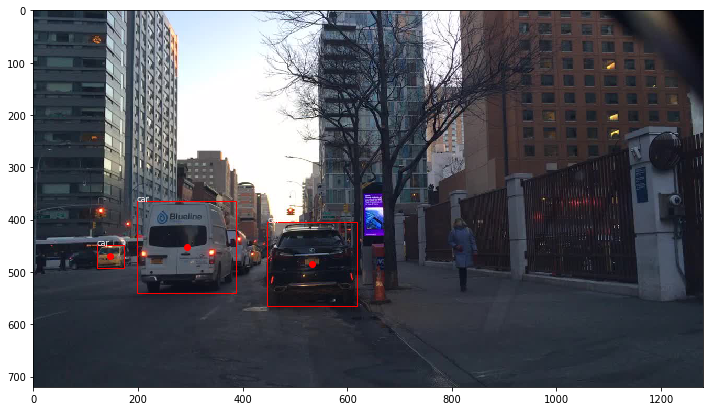

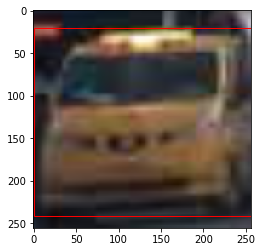

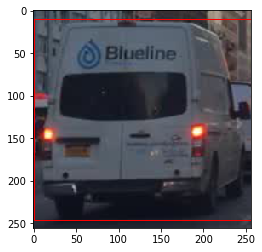

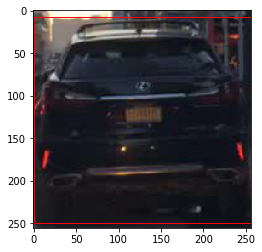

In [26]:
num = 6000
current_img = plt.imread(train_img_full / labels[num]['name'])
size = 256
print(current_img.shape)
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(current_img)
for d in labels[num]['labels']:
    if d['category'] == 'car' and not d['attributes']['occluded'] and not d['attributes']['truncated']:
        x1 = int(d['box2d']['x1'])
        y1 = int(d['box2d']['y1'])
        x2 = int(d['box2d']['x2'])
        y2 = int(d['box2d']['y2'])
        x_center = x1 + (x2 - x1) // 2
        y_center = y1 + (y2 - y1) // 2
        ax.add_patch(patcher.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='None'))
        ax.annotate(d['category'], color='w', xy=(x1, y1), fontsize=8)
        ax.scatter(x_center, y_center, c ='r')
        fig, ax2 = plt.subplots()
        dim = max((x2 - x1)//2, (y2 - y1)//2)
        #ax2.imshow(current_img[y_center - dim:y_center+dim, x_center-dim:x_center+dim, :])
        top_left_x = x_center - dim                                                      
        top_left_y = y_center - dim                                                      
        to_resize = current_img[y_center - dim:y_center+dim, x_center-dim:x_center+dim, :]
        h_r, w_r, c = to_resize.shape
        ax2.imshow(cv2.resize(to_resize, (256, 256)))
        # resize bbox according to cv2 resize assumed scale
        x1_shift = (x1 - top_left_x) * (size/h_r)
        y1_shift = (y1 - top_left_y) * (size/w_r)
        x2_shift = x1_shift + (x2-x1) * (size/h_r)                                                 
        y2_shift = y1_shift + (y2-y1) *(size/w_r)
        dx = x2_shift - x1_shift
        dy = y2_shift - y1_shift
        ax2.add_patch(patcher.Rectangle((x1_shift, y1_shift), dx, dy, linewidth=1, edgecolor='r', facecolor='None'))

In [95]:
z = []
for items in labels:
    z.append(items['labels'][0]['category'])

In [67]:
for i in range(20):
    #print(train_img_full / labels[i]['name'])
    temp_img = plt.imread(train_img_full / labels[i]['name'])
    for objects in labels[i]['labels']:
        print(objects['category'])
        print(objects['box2d'])

traffic light
{'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}
traffic light
{'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}
traffic sign
{'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}
traffic sign
{'x1': 0, 'y1': 0.246631, 'x2': 100.381647, 'y2': 122.825696}
car
{'x1': 45.240919, 'y1': 254.530367, 'x2': 357.805838, 'y2': 487.906215}
car
{'x1': 507.82755, 'y1': 221.727518, 'x2': 908.367588, 'y2': 442.715126}
traffic sign
{'x1': 0.156955, 'y1': 0.809282, 'x2': 102.417429, 'y2': 133.411856}
drivable area


KeyError: 'box2d'